In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('HousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [4]:
for col in df.columns:
    mean_val = df[col].median()
    df[col] = df[col].fillna(mean_val)

In [5]:
# df.dropna(inplace=True)

In [6]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

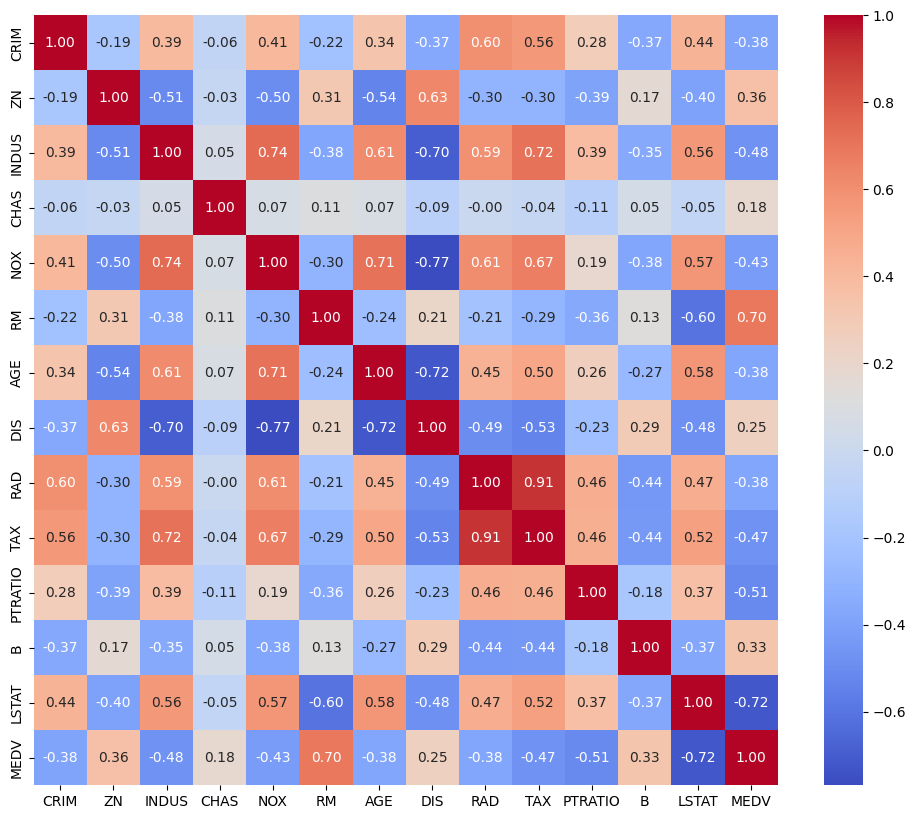

In [8]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [9]:
df.drop(columns='TAX', inplace=True)

In [10]:
for col in df[['CRIM', 'B', 'RM', 'LSTAT', 'MEDV']]:
    median_val = df[col].median()
    print(f'Kolom {col} : {median_val}')

Kolom CRIM : 0.253715
Kolom B : 391.44
Kolom RM : 6.2085
Kolom LSTAT : 11.43
Kolom MEDV : 21.2


In [11]:
df['MEDV'] = df['MEDV'].apply(lambda x : 0 if x < 25 else 1)
# df['B'] = df['B'].apply(lambda x : 0 if x < 395 else 1)
# df['RM'] = df['RM'].apply(lambda x : 0 if x < 5 else 1)
# df['LSTAT'] = df['LSTAT'].apply(lambda x : 0 if x < 15 else 1)
# df['CRIM'] = df['CRIM'].apply(lambda x : 0 if x < 0.25 else 1)

<Axes: >

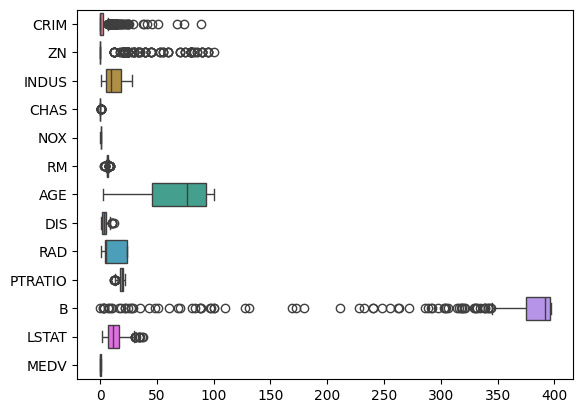

In [12]:
sns.boxplot(df, orient='h')

In [13]:
for col in df.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lwr = q1 - 1.5 * iqr
    upr = q3 + 1.5 * iqr
    mean_val = df[col].mean()
    df[col] = df[col].apply(lambda x : mean_val if x < lwr or x > upr else x)

<Axes: >

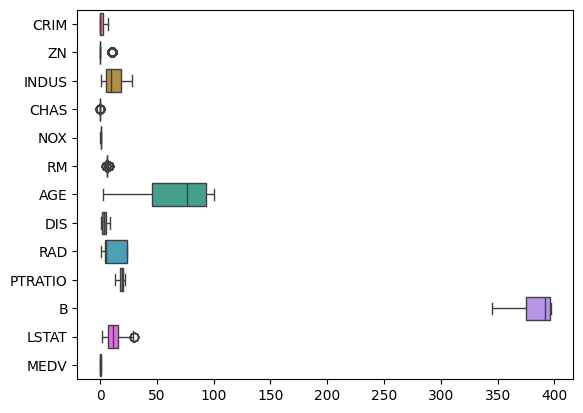

In [14]:
sns.boxplot(df, orient='h')

In [15]:
from sklearn.model_selection import train_test_split

# Perform stratified split
x = df.drop(columns=['MEDV'])
y = df['MEDV']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

# Display the shape of the resulting datasets
print("x_train:", x_train.shape)
print("x_test:", x_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

x_train: (404, 12)
x_test: (102, 12)
y_train: (404,)
y_test: (102,)


In [16]:
from imblearn.over_sampling import SMOTE

# Gabungkan x_train dan y_train
df_train = pd.concat([x_train, y_train], axis=1)

# Lakukan SMOTE pada df_train
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(df_train.drop(columns=['MEDV']), df_train['MEDV'])

In [17]:
min_val = x_train_smote.min(axis=0)
max_val = x_train_smote.max(axis=0)
range_val = max_val - min_val
range_val[range_val == 0] = 1
x_train_scaled = (x_train_smote - min_val) / range_val
x_test_scaled = (x_test - min_val) / range_val

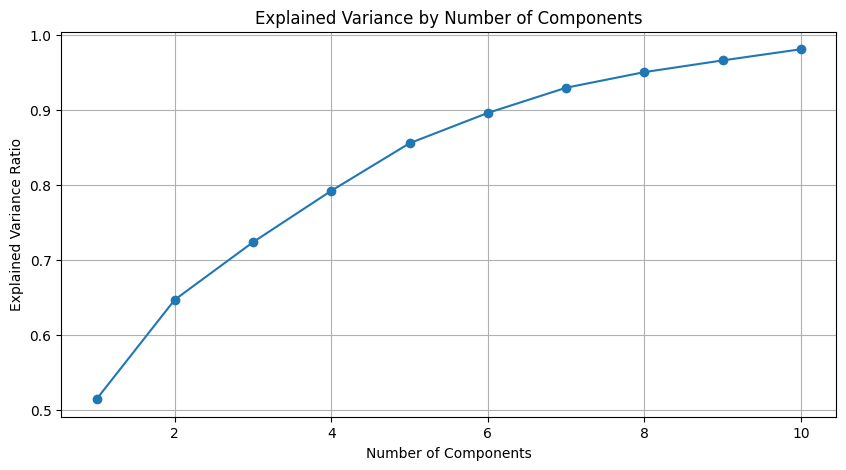

In [18]:
from sklearn.decomposition import PCA

# Perform PCA on x_train
explained_variance_ratios = []
for n in range(1, 11):
    pca = PCA(n_components=n)
    pca.fit(x_train_scaled)
    explained_variance_ratios.append(sum(pca.explained_variance_ratio_))

# Visualize the explained variance
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), explained_variance_ratios, marker='o')
plt.title('Explained Variance by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

In [19]:
# Perform PCA with n_components=7 on x_train_scaled
pca = PCA(n_components=6)
x_train_pca = pca.fit_transform(x_train_scaled)

# Transform x_test_scaled using the same PCA model
x_test_pca = pca.transform(x_test_scaled)

# Display the shape of the resulting datasets
print("Shape of x_train after PCA:", x_train_pca.shape)
print("Shape of x_test after PCA:", x_test_pca.shape)

Shape of x_train after PCA: (598, 6)
Shape of x_test after PCA: (102, 6)


For n_clusters = 2, the average silhouette_score is : 0.41234847339828207
For n_clusters = 3, the average silhouette_score is : 0.4520291023212962
For n_clusters = 4, the average silhouette_score is : 0.4008191073492167
For n_clusters = 5, the average silhouette_score is : 0.38132155581142346
For n_clusters = 6, the average silhouette_score is : 0.35222259225584673
For n_clusters = 7, the average silhouette_score is : 0.3507729307253112
For n_clusters = 8, the average silhouette_score is : 0.3496891107683367
For n_clusters = 9, the average silhouette_score is : 0.33359497255477494
For n_clusters = 10, the average silhouette_score is : 0.3533118973664557


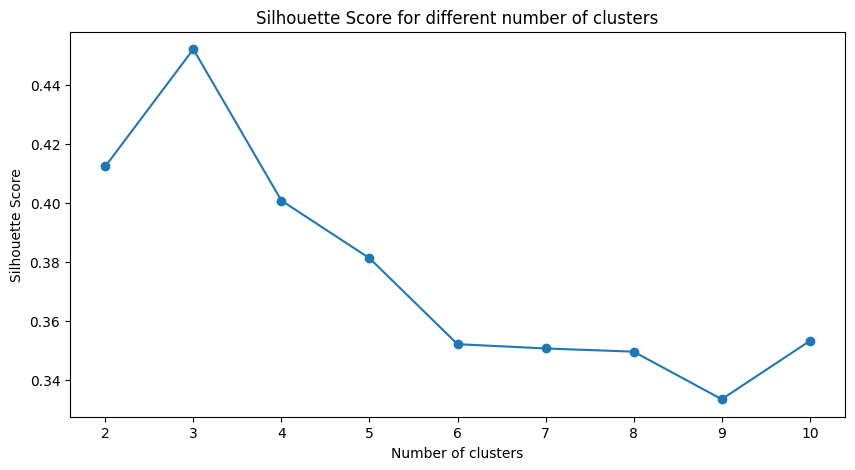

In [20]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

range_n_clusters = range(2, 11)

def silhouette_analysis(data, range_n_clusters):
    silhouette_avg_scores = []
    for n_clusters in range_n_clusters:
        clusterer = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = clusterer.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_avg_scores.append(silhouette_avg)
        print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")
    return silhouette_avg_scores

silhouette_avg_scores = silhouette_analysis(x_train_pca, range_n_clusters)

plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, silhouette_avg_scores, marker='o')
plt.title('Silhouette Score for different number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


K = 2 : 278.50255525633185
K = 3 : 174.0197745099427
K = 4 : 154.64757199831382
K = 5 : 135.82531839905818
K = 6 : 111.73274764012348
K = 7 : 98.55126111584293
K = 8 : 92.98213554542885
K = 9 : 86.90605725469494
K = 10 : 78.29923219811346


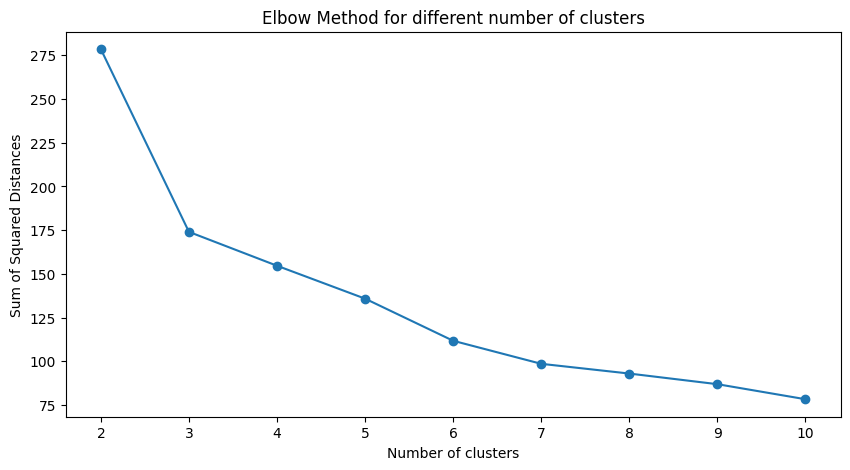

In [21]:
def elbow_method(data, range_n_clusters):
    sse = []
    for n_clusters in range_n_clusters:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
        print(f'K = {n_clusters} : {kmeans.inertia_}')
    return sse

sse = elbow_method(x_train_pca, range_n_clusters)

plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, sse, marker='o')
plt.title('Elbow Method for different number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances')
plt.show()

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model on the training data
knn.fit(x_train_pca, y_train_smote)

# Predict on the test data
y_pred = knn.predict(x_test_pca)

print(np.mean(y_pred == y_test) * 100)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

90.19607843137256
[[70  5]
 [ 5 22]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        75
           1       0.81      0.81      0.81        27

    accuracy                           0.90       102
   macro avg       0.87      0.87      0.87       102
weighted avg       0.90      0.90      0.90       102

